<a href="https://colab.research.google.com/github/Valerie0518/QM2/blob/main/Estee-Lauder-Trustpilot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
!pip install requests beautifulsoup4
import re
import requests
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt

In [75]:
def scrape_page(url):
    """抓取单个页面并返回文本内容."""
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    return soup.get_text(strip=True)

def scrape_all_pages(base_url, max_pages=10):
    """抓取所有页面并返回所有文本内容."""
    all_text = ""
    for page_num in range(1, max_pages + 1):
        url = f"{base_url}?page={page_num}"  # 构建分页 URL
        page_text = scrape_page(url)

        # 检查页面是否为空或重复，如果是则停止抓取
        if not page_text or page_text in all_text:
            break

        all_text += page_text
        print(f"已抓取页面 {page_num}")  # 可选：打印进度

    return all_text

# 设置基本 URL 和最大页数
base_url = "https://www.trustpilot.com/review/www.esteelauder.com"
max_pages = 19  # 根据需要调整

# 抓取所有页面
all_text = scrape_all_pages(base_url, max_pages)

# 可选：将文本保存到文件
with open("all_text_from_all_pages.txt", "w", encoding="utf-8") as f:
    f.write(all_text)

已抓取页面 1
已抓取页面 2
已抓取页面 3
已抓取页面 4
已抓取页面 5
已抓取页面 6
已抓取页面 7
已抓取页面 8
已抓取页面 9
已抓取页面 10
已抓取页面 11
已抓取页面 12
已抓取页面 13
已抓取页面 14
已抓取页面 15
已抓取页面 16
已抓取页面 17
已抓取页面 18
已抓取页面 19


In [86]:
keywords = ["offer", "customer service", "quality", "mislead", "charge issue", "refund"]
frequencies = []
chart = {}
for keyword in keywords:
    frequency = all_text.lower().count(keyword.lower())
    frequencies.append(frequency)
    chart[keyword] = frequency


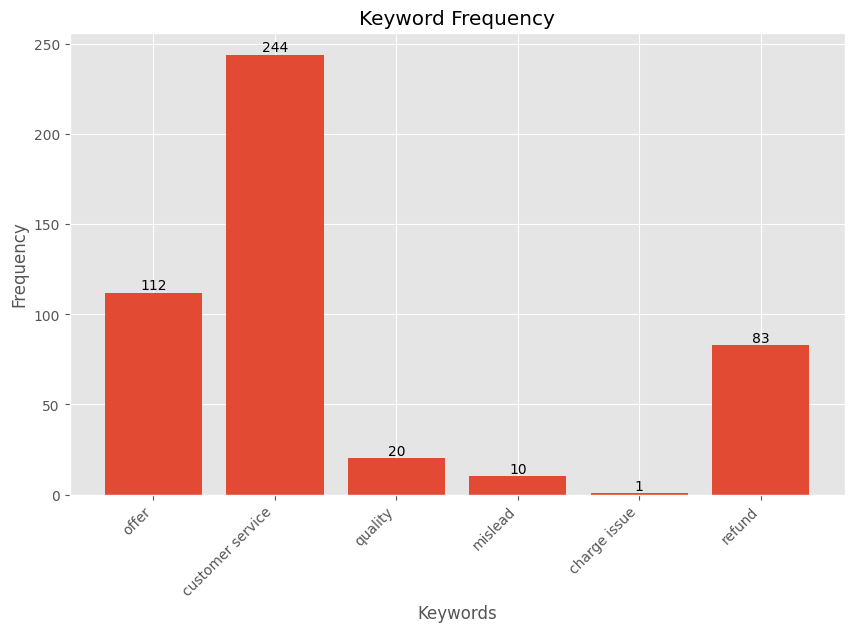

In [88]:
keyword = list(chart.keys())
frequencies = list(chart.values())

# 创建条形图
plt.figure(figsize=(10, 6))  # 设置图形大小
plt.bar(keyword, frequencies)

# 在每个条形图上添加总数
for i, v in enumerate(frequencies):
    plt.text(i, v, str(v), ha='center', va='bottom')

# 设置图表标题和标签
plt.title("Keyword Frequency")
plt.xlabel("Keywords")
plt.ylabel("Frequency")

# 旋转 x 轴标签以避免重叠
plt.xticks(rotation=45, ha='right')

# 显示图表
plt.show()